In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clickin run or pressing Shift+Enter) will list all files under the input directory
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meteorite1/meteorite-landings.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 
from sklearn.model_selection import train_test_split

# LIBRAIRIES 

In [5]:
pd.reset_option('display.max_rows')

# DONNEES


In [6]:
df=pd.read_csv('/kaggle/input/meteorite1/meteorite-landings.csv'
)
#données établit par la NASA

In [7]:
data=df.copy()
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [8]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [9]:
print('taille de la base de données:',np.shape(df) )

taille de la base de données: (45716, 10)


DESCRIPTIONS DES FEATURES :

**name**:le nom de la météorite qui est souvent associé a un lieu ou l on rajoute un chiffre , l année ect 

**id**:un identifiant unique associée à chaque météorite

**nametype**: 'valid' correspond a une météorite banal,'relict' correspond à une météorite qui a été dégradé par les conditions climatiques de la Terre

**mass**:la masse de la météorite en grammes

**reclass**: correspond a la classe de la météorite qui correspondent à leurs caractéristiques physiques chimiques ect

**fall** : si la chute de la météorite a été observé(fell) ou non (found)

**year**: l'année ou la météorite a chuté sur Terre ou l 'année ou la météorite a été découverte si l on a pas observée sa chute

**reclatt**: la lattitude de la météorite

**reclong**: la longitude de la météorite

**GeoLocation**:les coordonnées géographique de la météorite(longitude et latitude)

# QUESTIONS 

quels est la répartitions géographiques des chutes  de  météorites ?

prédire les coordonnées des chutes de météorite ou les valeurs manquent .

Quels sont les classes de météorites qui chute le plus sur terre ?

Peut on prédire ou chuteront les prochaines météorites?

Quel pays est le plus victime de chute de météorites?

Quel type de météorites est le plus suceptible de chuter sur Terre?  

# ANALYSE GENERAL

In [10]:
data.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


**Valeurs manquantes:**

In [11]:
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

**Valeurs en doubles**

In [12]:
print(data.duplicated().sum())

0


**Nombres de valeurs différentes pour chaque variable**

In [13]:
data.nunique()

name           45716
id             45716
nametype           2
recclass         466
mass           12576
fall               2
year             268
reclat         12738
reclong        14640
GeoLocation    17100
dtype: int64

**Types de données pour chaque variable** 

In [14]:
print(data.dtypes, '\nNombre de types de variables')

print(data.dtypes.value_counts())

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object 
Nombre de types de variables
object     5
float64    4
int64      1
Name: count, dtype: int64


Il faudra transformer les variables object en float ou int pour pouvoir les utiliser dans nos algorithme de machine learning

# EDA (Exploratory Data Analysis)

**Variables continues**

**year feature**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


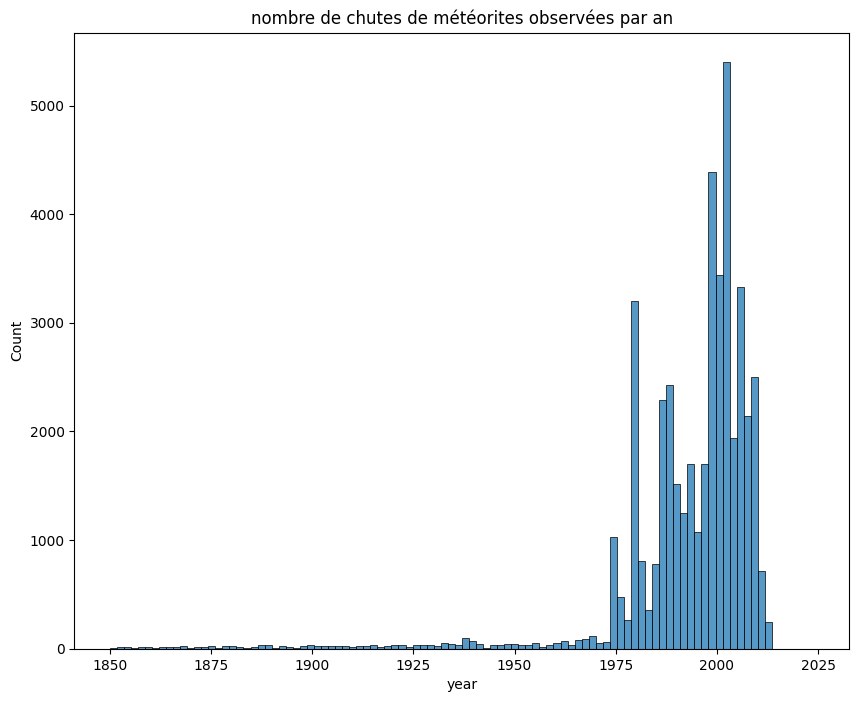

In [15]:
plt.figure(figsize=(10,8))
plt.title('nombre de chutes de météorites observées par an')
sns.histplot(data=data,x='year',bins=100,binrange=(1850,2024))
plt.show()

**Observations :** peu de cas avant 1975 car manque de recensements, un pic dans le début des années 2000 puis une chute vers les années 2020 . une amélioration possible est de se concentrer sur les années 1975-2013


In [16]:
data['year'].sort_values(ascending=False)

38188    2501.0
30679    2101.0
30760    2013.0
30773    2013.0
30759    2013.0
          ...  
38128       NaN
38201       NaN
38224       NaN
38328       NaN
45700       NaN
Name: year, Length: 45716, dtype: float64

En ordonnant les années , on trouve ce qui semble être une donnée fausse , une chute de météorite en l'an 2101 .

In [17]:
data.shape

(45716, 10)

Après une brêve recherche sur google , je constate que cette météorite northwest africa 7701 existe bien mais que l'année de sa chute est en 2010 . il faut donc supprimér cette ligne

In [18]:
data=data.drop(30682)
data=data.drop('id',axis=1)
data

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


**reclass feature**

In [19]:
print(data['recclass'].value_counts())
print('\n Il y a ',data['recclass'].nunique(),'nom de classes différentes')

recclass
L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: count, Length: 466, dtype: int64

 Il y a  466 nom de classes différentes


45716 classes différentes est un nombre bien trop élevé , essayons de faire un classement plus général.

On va classer selon ces classes :

**CC**:chondrites carbonaceous

**OC**:ordinary chondrites

**AC**:autres chondrites

**EC**:Enstatite chondrites

**MA**:martian achondrites

**PA** :primitive achondrites

**LA** :Lunar achondrites

**P**:Pallasite

**SOA** stony other achondrites

**IA** iron achondrites

**V** :vesta

**I**: Iron 

In [20]:
data=df.copy()
data = data[~data['recclass'].isin(['Unknown', 'Stone-uncl','Chondrite-ung','Relict',
                                    'Chondrite-fusion crust','Fusion crust','Stone-ung'])]
data = data[~data['recclass'].str.contains('\?', na=False)]

In [21]:
code={#on s occupe ici de la classe chondrites carbonaceous
    
      'CL':'CC','CM':'CC','CO':'CC','CV':'CC','CK':'CC','CR':'CC','CH':'CC','CB':'CC','CM2':'CC',
      'CBa': 'CC', 'CBb': 'CC', 'CH/CBb': 'CC', 'CR2-an': 'CC','CR2': 'CC','CR': 'CC','CR1': 'CC',
      'CR-an': 'CC','CH3':'CC','CO3.3': 'CC','CO3.2': 'CC','CO3.5': 'CC','CO3.6': 'CC','CO3.4': 'CC',
      'CO3.7': 'CC','CO3': 'CC','CO3.0': 'CC','CO3.8': 'CC','CO3.1': 'CC','CM1/2': 'CC','CM1': 'CC',
      'CM-an': 'CC','CM2-an': 'CC','CM': 'CC','CV3': 'CC', 'CV3-an': 'CC', 'CV2': 'CC','CK4': 'CC',
      'CK6': 'CC','CK5': 'CC','CK3': 'CC','CK4/5': 'CC','CK3-an': 'CC','CK5/6': 'CC','CK4-an': 'CC',
      'CK': 'CC','CK3/4': 'CC','CK3.8': 'CC','C2-ung': 'CC', 'C3-ung': 'CC', 'C6': 'CC', 'C4': 'CC',
      'C1-ung': 'CC', 'C4-ung': 'CC', 'C2': 'CC', 'C4/5': 'CC', 'C5/6-ung': 'CC', 'C3.0-ung': 'CC',
     'C3/4-ung': 'CC', 'C1/2-ung': 'CC','C':'CC','CO3 ':'CC','CH3 ':'CC','CR7':'CC',
      
     #la classe des ordinary chondrites
      'H':'OC','H6': 'OC','H5': 'OC','H4': 'OC','H4-an': 'OC','H4-5': 'OC','H6':'OC','H5 ':'OC','H4 ':'OC',
      'H3.8': 'OC','H3-5': 'OC','H5-6': 'OC','H5-7': 'OC','H4-6': 'OC','H3': 'OC','H3.7': 'OC',
      'H4/5': 'OC','H3/4': 'OC','H3-6': 'OC','H5/6': 'OC','H3-4': 'OC','H3.4': 'OC','H3.9/4': 'OC',
      'H3.9': 'OC','H3.6-6': 'OC','H3.8-5': 'OC','H3.8/4': 'OC','H3.9-5': 'OC', 'H~5': 'OC','H~6': 'OC',
      'H~4': 'OC','H3.6': 'OC','H3.5-4': 'OC','H3.5': 'OC','H7': 'OC','H3.3': 'OC','H3.7-6': 'OC',
      'H3.0': 'OC','H3.1': 'OC','H5-an': 'OC','H3-an': 'OC','H3.9-6': 'OC','H-an': 'OC',
      'H3.2': 'OC','H3.4/3.5': 'OC','H(5?)': 'OC','H~4/5': 'OC','H4(?)': 'OC','H3.8-4': 'OC',
      'H4/6': 'OC', 'H3.7-5': 'OC','H3.7/3.8': 'OC','H3.05': 'OC','H3.10': 'OC','H6/7': 'OC',
      'H3.15': 'OC','H3.0-3.4': 'OC','H3.8/3.9': 'OC','H3.8-6': 'OC','H3.4-5': 'OC',
      'H3.2-3.7': 'OC','H3.8-an': 'OC','H3.2-6': 'OC','H(?)4': 'OC','H3.2-an': 'OC','H3 ':'OC',
      'H-metal':'OC','H6 ':'OC','OC3':'OC',
    
'L5 ':'OC', 'L5': 'OC','L6': 'OC','LL3-6': 'OC','L': 'OC','LL5': 'OC','L/LL4': 'OC','L3': 'OC','LL6': 'OC',
'L4': 'OC','LL4': 'OC','LL3.8': 'OC','LL3.15': 'OC','LL3.9': 'OC','H/L3.9': 'OC','L/LL6': 'OC','L4 ':'OC',
'H/L4': 'OC','L3.7': 'OC','LL3.4': 'OC','L3-6': 'OC','L/LL5': 'OC','L3.4': 'OC','L3.7-6': 'OC',
'L5/6': 'OC','L3.6': 'OC','LL3.2': 'OC','L3-4': 'OC','L5-6': 'OC','LL3.6': 'OC',
'LL': 'OC','L4-6': 'OC','LL3.00': 'OC', 'LL3.3': 'OC','H/L3.6': 'OC', 'LL7': 'OC', 'LL4-6': 'OC',
'L/LL6-an': 'OC', 'L3.8': 'OC', 'LL5-6': 'OC', 'LL3.8-6': 'OC', 'L3.9': 'OC', 'L4-5': 'OC',
'L3-5': 'OC', 'LL4/5': 'OC', 'L4/5': 'OC', 'L3.9/4': 'OC', 'L/LL3.10': 'OC','LL3': 'OC',
'L~6': 'OC', 'L~3': 'OC', 'L(LL)3.5-3.7': 'OC', 'L3.4-3.7': 'OC', 'L3.5': 'OC', 'LL7(?)': 'OC',
'LL6(?)': 'OC', 'L/LL3': 'OC', 'L(?)3': 'OC', 'L3.2': 'OC', 'L3.7-3.9': 'OC', 'LL3.7': 'OC',
'LL3.5': 'OC', 'L3.7-4': 'OC', 'L3.3': 'OC', 'L3.1': 'OC', 'L3.0': 'OC', 'L/LL3.4': 'OC',
'LL3.0': 'OC', 'L6/7': 'OC', 'L~5': 'OC', 'LL~6': 'OC', 'L3.9-6': 'OC', 'L/LL3-6': 'OC',
'L/LL3-5': 'OC', 'H/L3.5': 'OC', 'H/L3': 'OC', 'LL4-5': 'OC', 'H/L6': 'OC', 'L3/4': 'OC',
'H(L)3-an': 'OC', 'L(LL)3': 'OC', 'H(L)3': 'OC', 'L7': 'OC', 'L/LL~6': 'OC', 'L/LL~5': 'OC',
'L~4': 'OC', 'L/LL~4': 'OC', 'LL(L)3': 'OC', 'LL5/6': 'OC', 'LL3/4': 'OC', 'H/L5': 'OC',
'L6-melt breccia': 'OC', 'L3.5-3.7': 'OC', 'L3.3-3.7': 'OC', 'L3.2-3.6': 'OC', 'L3.3-3.6': 'OC',
'L3.05': 'OC', 'L/LL3.2': 'OC', 'L3.5-5': 'OC', 'L/LL(?)3': 'OC', 'L5-7': 'OC','L-melt rock': 'OC',
'L-metal': 'OC', 'L/LL5/6': 'OC', 'H/L~4': 'OC', 'LL3.7-6': 'OC', 'L3.7/3.8': 'OC',
'LL-melt rock': 'OC', 'L3.5-3.9': 'OC', 'L3.2-3.5': 'OC', 'L3.3-3.5': 'OC', 'L3.0-3.7': 'OC',
'L(LL)3.05': 'OC', 'L3.10': 'OC', 'L/LL4/5': 'OC', 'L3.8-an': 'OC', 'L3.8-6': 'OC',
'LL3.10': 'OC', 'L3.8-5': 'OC', 'H/L3-4': 'OC', 'L(H)3': 'OC', 'LL6/7': 'OC', 'LL3.1': 'OC',
'LL~4': 'OC', 'LL~4/5': 'OC', 'L(LL)~4': 'OC', 'LL3-5': 'OC', 'H/L3.7': 'OC', 'LL3-4': 'OC',
'LL<3.5': 'OC', 'L/LL-melt rock': 'OC', 'L4-melt rock': 'OC', 'L6-melt rock': 'OC',
'H/L4/5': 'OC',  'H/L6-melt rock': 'OC', 'L3-7': 'OC', 'LL3.05': 'OC', 'LL4/6': 'OC',
'LL3.8-4': 'OC', 'LL-melt breccia': 'OC', 'LL6-melt breccia': 'OC', 'L5-melt breccia': 'OC',
'LL(L)3.1': 'OC', 'LL6-an': 'OC', 'L4-melt breccia': 'OC', 'L3-melt breccia': 'OC',
'L~4-6': 'OC', 'LL~5': 'OC',  'L3.00': 'OC', 'L/LL4-6': 'OC', 'L4-an': 'OC', 'L3.9-5': 'OC',
'L3.0-3.9': 'OC', 'L3.5-3.8': 'OC', 'L3.6-4': 'OC', 'L/LL3.5': 'OC', 'L/LL3.6/3.7': 'OC',
'H/L4-5': 'OC', 'LL~3': 'OC', 'LL5-7': 'OC', 'LL3.9/4': 'OC', 'L/LL5-6': 'OC', 'L(LL)5': 'OC',
'L(LL)6': 'OC', 'LL3.1-3.5': 'OC',  'L/LL': 'OC','OC':'OC','Enst achon': 'OC', 'Enst achon-ung': 'OC',
'Relict H':'OC','Relict H':'OC','L-imp melt':'OC','LL-imp melt':'OC','H-imp melt':'OC','Relict OC':'OC',
'L-imp melt': 'OC', 'H-imp melt': 'OC', 'L-melt breccia': 'OC', 'H6-melt breccia': 'OC',
'H5-melt breccia': 'OC', 'H-melt rock': 'OC', 'LL-imp melt': 'OC', 'L6-melt breccia': 'OC',
'L-melt rock': 'OC', 'LL-melt rock': 'OC',  'Impact melt breccia': 'OC', 'L/LL-melt rock': 'OC',
'L4-melt rock': 'OC', 'L6-melt rock': 'OC', 'H/L6-melt rock': 'OC', 'LL-melt breccia': 'OC',
'LL6-melt breccia': 'OC', 'L5-melt breccia': 'OC', 'L4-melt breccia': 'OC', 'H4-melt breccia': 'OC',
'L3-melt breccia': 'OC', 'H-melt breccia': 'OC', 'Acapulcoite': 'OC', 'Acapulcoite/Lodranite': 'OC',
 'Acapulcoite/lodranite': 'OC','LL6 ':'OC',
    
      
      
      
       #les enstatite chondrites
      'EH':'EC','EL':'EC','L6':'EC','L6 ':'EC','H5':'EC','L5':'EC','H6':'EC','H4':'EC','LL5':'EC',
      'LL6':'EC','L4':'EC','H4/5':'EC','H3':'EC','L3':'EC','EH4': 'EC', 'EH3/4-an': 'EC',
    'EH7-an': 'EC', 'EH3': 'EC', 'EH5': 'EC', 'EH4/5': 'EC', 'EH-imp melt': 'EC',
     'EH6': 'EC', 'EH7': 'EC', 'EH6-an': 'EC','EL6': 'EC', 'EL5': 'EC', 'EL3': 'EC', 'EL4': 'EC',
    'EL4/5': 'EC', 'EL6/7': 'EC', 'EL7': 'EC', 'EL-melt rock': 'EC', 'EL3/4': 'EC','E':'EC',
    'EH4': 'EC', 'EL6': 'EC', 'EH3/4-an': 'EC', 'EH7-an': 'EC', 'EH3': 'EC', 'EH5': 'EC',
     'E4': 'EC', 'EL5': 'EC',  'EL3': 'EC', 'E6': 'EC', 'EH4/5': 'EC', 'EL4': 'EC', 'EL4/5': 'EC',
    'E': 'EC', 'EH': 'EC', 'EL6/7': 'EC', 'EL7': 'EC', 'EH-imp melt': 'EC', 'E3-an': 'EC',
     'E3': 'EC', 'EL-melt rock': 'EC', 'EH6': 'EC',  'EL3/4': 'EC',  'EH7': 'EC', 'E-an': 'EC',
    'E5': 'EC', 'E5-an': 'EC', 'EH6-an': 'EC','EH-imp melt':'EC','Aubrite-an':'EC','EL6 ':'EC',
      
      
      
      #les autres chondrites
      'R':'AC','K':'AC','R3.8-6': 'AC', 'R3.8-5': 'AC', 'R3.6': 'AC', 'R4': 'AC', 'R3-6': 'AC',
     'R3.8': 'AC', 'R3.5-6': 'AC', 'R3-4': 'AC', 'R3': 'AC', 'R5': 'AC', 'R': 'AC', 'R6': 'AC',
     'R3/4': 'AC', 'R3.9': 'AC', 'R4/5': 'AC', 'R3.7': 'AC', 'R3-5': 'AC', 'R3.4': 'AC',
     'R3.5-4': 'AC','K3':'AC',
    
      #primitive achondrites
      'Ureilite':'PA','Brachinite':'PA','Acapulcoite':'PA','Lodranite':'PA','Winonaite':'PA',
      'IAB-sLL':'PA','Iron, IAB-MG':'PA','Iron, IAB-sHL':'PA','Iron, IAB-ung':'PA',
      'Iron, IAB complex':'PA','Iron, IAB-sLM':'PA','Iron, IAB-sHH':'PA','Iron, IAB-sLH':'PA',
      'Iron, IAB-an':'PA','Iron, IAB-sHL-an':'PA','Ureilite-an': 'PA','Ureilite-pmict': 'PA',
    'Iron, IAB-sLL': 'PA','Iron, IAB?': 'PA','Achondrite-prim':'PA','Achondrite-ung': 'PA',
    
      #il y a 4 variables qui ont pour classe :Iron, IAB?
      
      #martian achondrites
      'Martian':'MA','Martian (chassignite)':'MA','Martian (nakhlite)':'MA','Martian (OPX)':'MA',
      'Martian (basaltic breccia)':'MA','Martian (shergottite)':'MA',
      
      #lunar achondrites ,1 valeur avec LUNAR ? 
      
      'Lunar (anorth)':'LA','Lunar':'LA','Lunar (feldsp. breccia)':'LA','Lunar (basalt)':'LA',
      'Lunar (gabbro)':'LA','Lunar (bas/anor)':'LA','Lunar (bas. breccia)':'LA',
      'Lunar (bas/gab brec)':'LA','Lunar (norite)':'LA',
      
      #pallasite
      
      'Pallasite, PMG':'P','Pallasite':'P','Pallasite, PMG-an':'P','Pallasite, ungrouped':'P',
      'Pallasite, PES':'P',
      #stony other achondrites
      'Angrite':'SOA','Aubrite':'SOA',
      
      #mesosiderite
      
      'Mesosiderite':'M','Mesosiderite-C':'M','Mesosiderite-A1':'M','Mesosiderite-an':'M',
      'Mesosiderite-B2':'M','Mesosiderite-B1':'M','Mesosiderite-B':'M','Mesosiderite-A3':'M',
      'Mesosiderite-B4':'M','Mesosiderite-A2':'M','Mesosiderite-A4':'M','Mesosiderite-A':'M',
      'Mesosiderite-C2':'M','Mesosiderite-A3/4':'M',
      
      #iron achondrites
      
      'Iron, IIIAB':'IA','Iron, IIAB':'IA','Iron, ungrouped':'IA','Iron, IVA':'IA','Iron, IID':'IA',
      'Iron, IVB':'IA','Iron, IIE':'IA','Iron, IIIE':'IA','Iron, IC':'IA','CI1':'IA','Iron, IIIF':'IA',
      'Iron, IIC':'IA','Iron, IIE-an':'IA','Iron, IIF':'IA','Iron, IVA-an':'IA','Iron, IIG':'IA',
      'Iron, IIIAB-an':'IA','Iron, IC-an':'IA','Iron, IID-an':'IA','Iron, IIAB-an':'IA',
      'Iron, IIIE-an':'IA',      
      #vesta
      
      'Eucrite':'V','Eucrite-pmict':'V','Eucrite-mmict':'V','Eucrite-br':'V','Eucrite-unbr':'V',
      'Eucrite-cm':'V','Eucrite-Mg rich':'V','Eucrite-an':'V','Diogenite':'V','Diogenite-pm':'V',
      'Diogenite-olivine':'V','Diogenite-an':'V','Howardite':'V','Howardite-an':'V',
    'Lodranite-an':'V',

      
      #iron 
      'Iron':'I','Relict iron':'I' , 
     }



In [22]:
s=data[data['recclass'].str.contains('L',case=True)]
#s=s[~s['recclass'].str.contains('cm',case=False,na=False)]
s['recclass'].value_counts(ascending=True)

recclass
L/LL          1
L/LL4/5       1
L3.8-an       1
H/L3-4        1
L(H)3         1
           ... 
L4         1253
LL6        2043
LL5        2766
L5         4796
L6         8285
Name: count, Length: 194, dtype: int64

In [23]:
data['recclass']=data['recclass'].map(code)

In [24]:
data['recclass'].nunique()

13

Nous avons réussit a passer de 466 classes différentes à seulement 13 classes 

les météorites qui nous interessent sont celles qui sont dangereuses donc qui puissent avoir une masse assez grande , on va donc convertir la masse en kilogramme 

In [25]:
data['mass']=data['mass'] / 1000

In [26]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,EC,0.0210,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,EC,0.7200,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EC,107.0000,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,PA,1.9140,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,EC,0.7800,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,V,0.1720,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,P,0.0460,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,EC,0.0033,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,EC,2.1670,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


on renomme aussi la colonne


In [27]:
data=data.rename(columns={'reclat':'latitude','reclong':'longitude'})

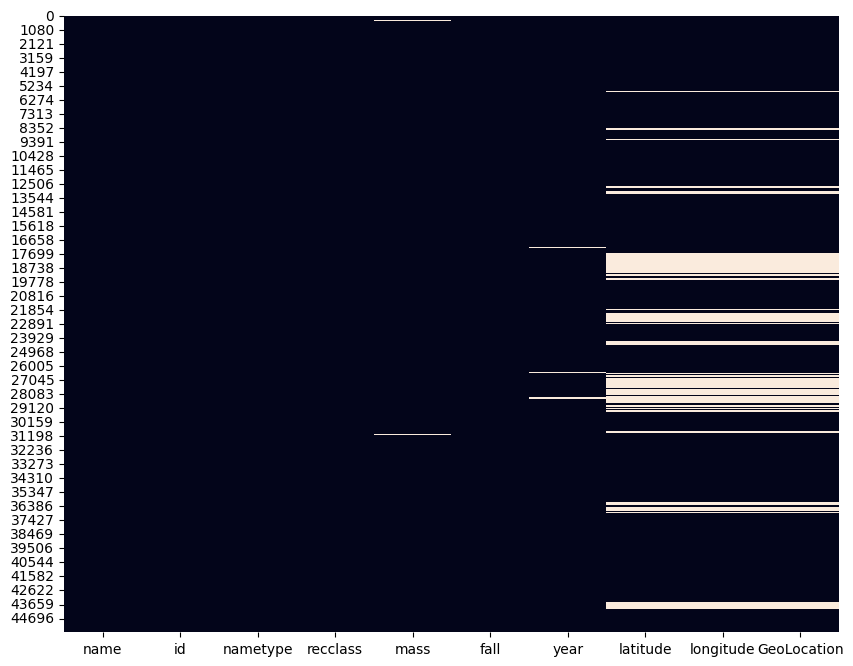

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isna(),cbar=False)
plt.show()

on observe que les classes longitude , latitude et geolocalisation sont lié . Il est obligatoire d avoir les 3 valeurs ou alors aucune . On ne peut donc pas simplement se débarasser des lignes contenant aucun valeurs .

la catégorie recclass ne manque pas de valeurs , mais la catégorie mass si . On pourrait utiliser la catégorie reclass pour que si la mass n est pas une valeur connu alors on la remplace par la moyenne de la mass de sa classe .

In [29]:
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            103
fall              0
year            286
latitude       7298
longitude      7298
GeoLocation    7298
dtype: int64

prenons un point au hasard dans l océan pour les valeurs manquantes de localisation pour l instant ,

on aura :Latitude: 10.82533, Longitude: -160.19655

In [30]:
prot_data=data.copy()

on a 289 données manquantes sur les années , on peut se débarasser vu que la quantité est assez faible 

In [31]:
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            103
fall              0
year            286
latitude       7298
longitude      7298
GeoLocation    7298
dtype: int64

On veut déterminer les coordonées géographiques possibles en utilisant des méthodes de régression 

In [32]:
miss_data=data[data['latitude'].isna()]
data_nona=data.dropna()
data_nona

,name,id,nametype,recclass,mass,fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,EC,0.0210,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,EC,0.7200,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EC,107.0000,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,PA,1.9140,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,EC,0.7800,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,V,0.1720,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,P,0.0460,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,EC,0.0033,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,EC,2.1670,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [33]:
encoded_data=prot_data

In [34]:
encoded_data=encoded_data.drop(['name','GeoLocation','id'],axis=1)

On observe bien sur une corrélation entre la longitude et la latitude . On observe aussi une corrélation entre l année et si la chute de la météorite a été observée ce qui semble aussi cohérent .

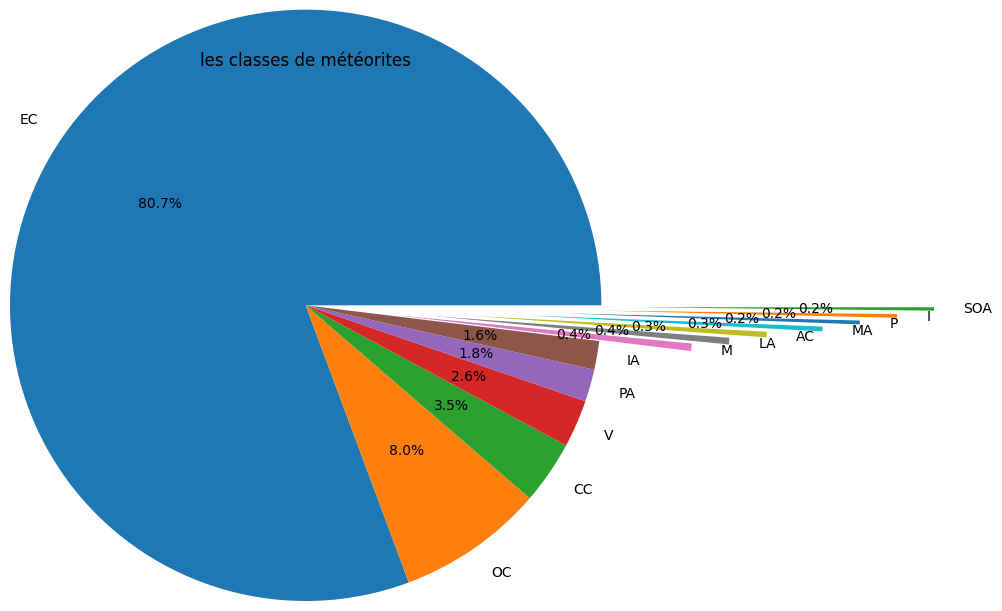

In [35]:
explode=[0, 0, 0, 0,0,0,0.5,0.7,0.9,1.2,1.4,1.6,1.8]
np.shape(explode)

plt.figure(figsize=(10,6))

colors=sns.color_palette('pastel')
plt.pie(data['recclass'].value_counts(),labels=['EC','OC','CC','V','PA','IA','M','LA','AC',
                                                'MA','P','I','SOA'] ,autopct='%1.1f%%',
        explode=explode,labeldistance=1.1,radius=1.6)
plt.title('les classes de météorites')
plt.show()

on constate que les météorites de classes enstatites chondrites sont en grosse majorité présents

In [36]:
data['nametype'].value_counts()

nametype
Valid     45544
Relict       67
Name: count, dtype: int64

In [37]:
data['name'].value_counts(ascending=False)

name
Aachen                    1
Northwest Africa 7489     1
Northwest Africa 7455     1
Northwest Africa 7456     1
Northwest Africa 7459     1
                         ..
Grove Mountains 052318    1
Grove Mountains 052319    1
Grove Mountains 052320    1
Grove Mountains 052321    1
Zulu Queen                1
Name: count, Length: 45611, dtype: int64

on constate que les noms des météorites donnes parfois des indices sur le lieu de chute . Analysons donc les noms pour ensuite déterminer quels sont les coordonnées longitude latitude qui nous manquent .

In [38]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the world map from Geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def map(data):
    meteorites = data.dropna(subset=['longitude', 'latitude'])
    # Create a GeoDataFrame
    geometry = gpd.points_from_xy(meteorites['longitude'], meteorites['latitude'])
    geo_meteorites = gpd.GeoDataFrame(meteorites, geometry=geometry)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # Create a plot
    fig, ax = plt.subplots(figsize=(20, 15))
    # Plot the world map
    world.boundary.plot(ax=ax, linewidth=1)
    # Plot the meteorite falls
    geo_meteorites.plot(ax=ax, color='red', markersize=5, alpha=0.6)
    # Remove axes
    ax.set_axis_off()
    # Show plot
    return plt.show()

/tmp/ipykernel_33/2716516927.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


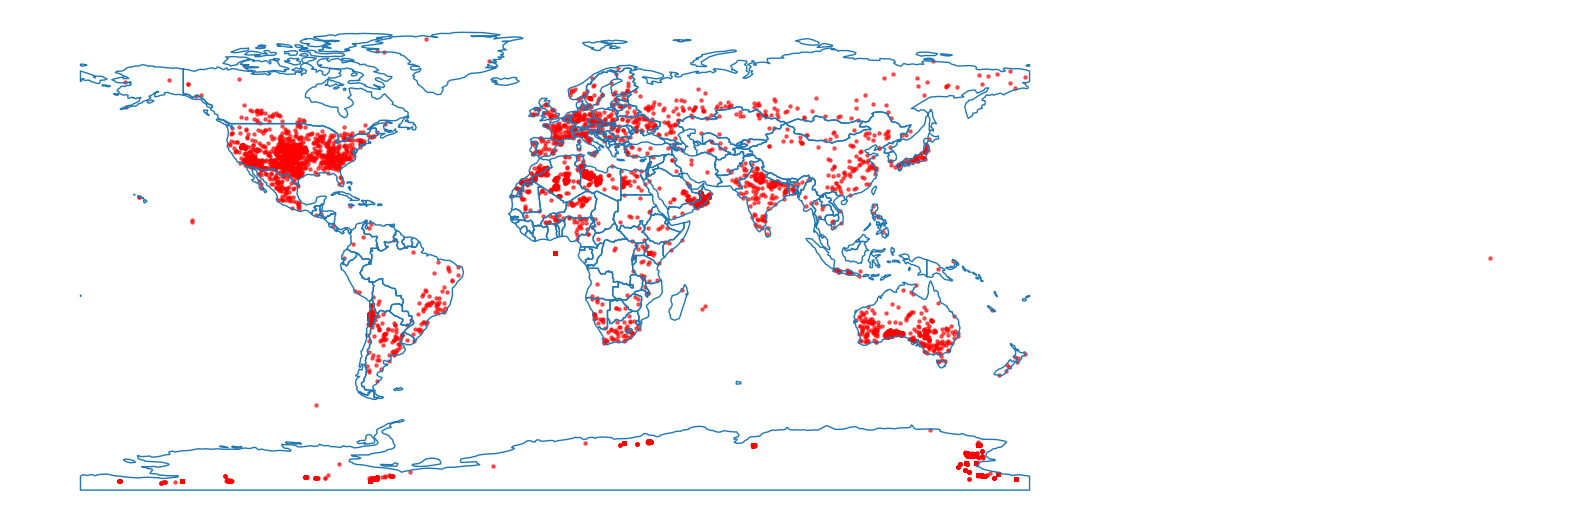

In [39]:
map(data)

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


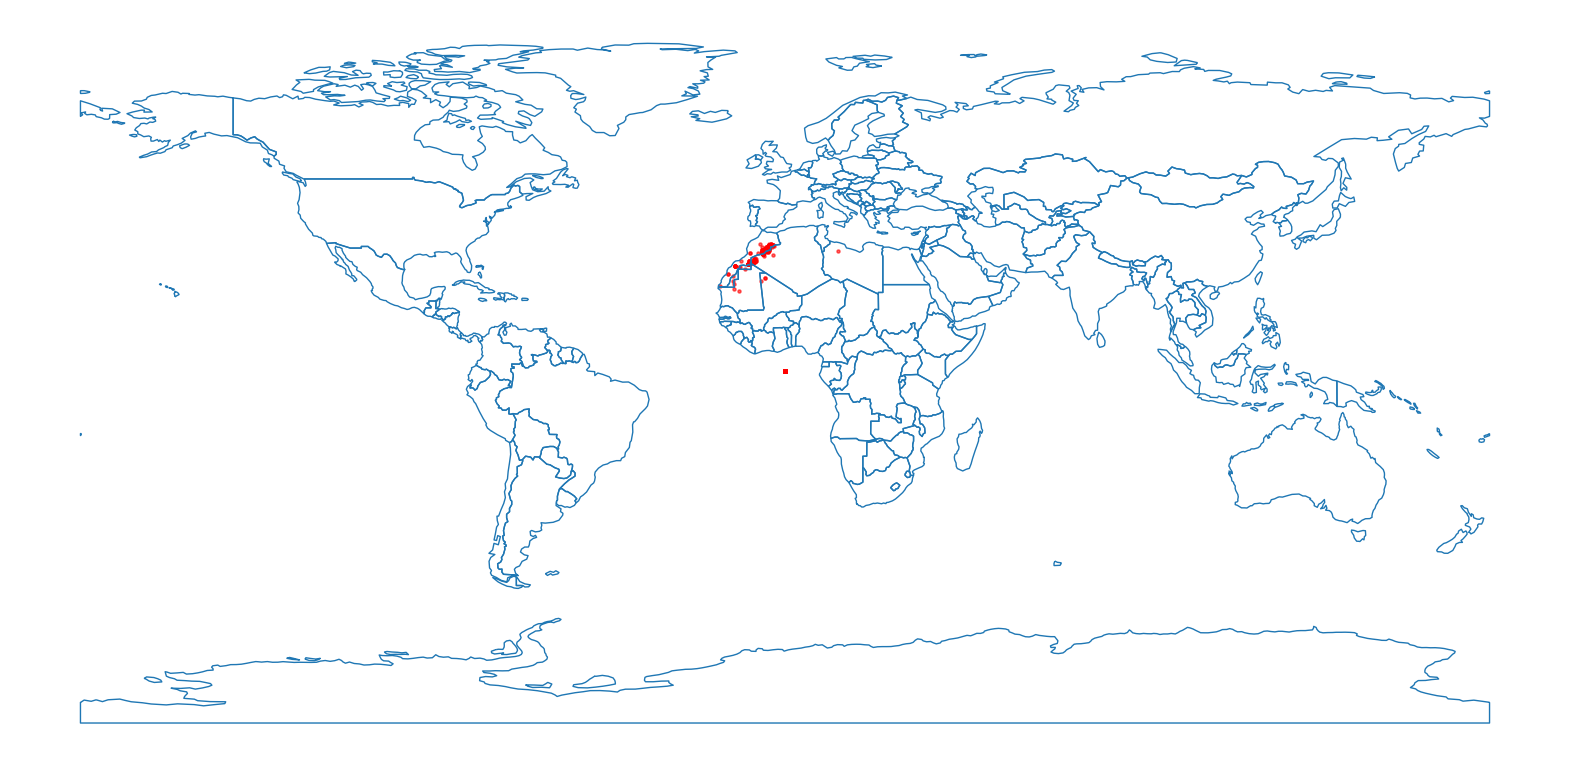

In [40]:
v=data[data['name'].str.contains('africa',case=False)]
map(v)

In [41]:
v[v['latitude'].isnull()]

,name,id,nametype,recclass,mass,fall,year,latitude,longitude,GeoLocation
26404,Northeast Africa 001,30759,Valid,LA,0.2620,Found,2002.0,NaN,NaN,NaN
26405,Northeast Africa 002,34270,Valid,IA,5.4800,Found,2004.0,NaN,NaN,NaN
26407,Northwest Africa 001,17011,Valid,EC,1.2000,Found,1999.0,NaN,NaN,NaN
26452,Northwest Africa 047,17057,Valid,V,5.2000,Found,2000.0,NaN,NaN,NaN
26453,Northwest Africa 048,17058,Valid,EC,0.8510,Found,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
30901,Northwest Africa 992,17919,Valid,EC,0.5600,Found,2001.0,NaN,NaN,NaN
30902,Northwest Africa 995,17920,Valid,EC,0.2229,Found,2001.0,NaN,NaN,NaN
30903,Northwest Africa 998,17921,Valid,MA,0.4560,Found,2001.0,NaN,NaN,NaN
30904,Northwest Africa 999,31988,Valid,V,0.3300,Found,2000.0,NaN,NaN,NaN


par exemple ici on constate que 2552 météorites n ont pas de coordonnées géographique , cependant grace au noms on pourrait déterminer le lieu approximatif de sa chute. on va donc essayer de construire un réseau de neurone pour déterminer les coordonnées géographiques grace au nom de la météorite

essayons de voir si il y a une corrélation entre le lieu de chute et le type de météorite

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


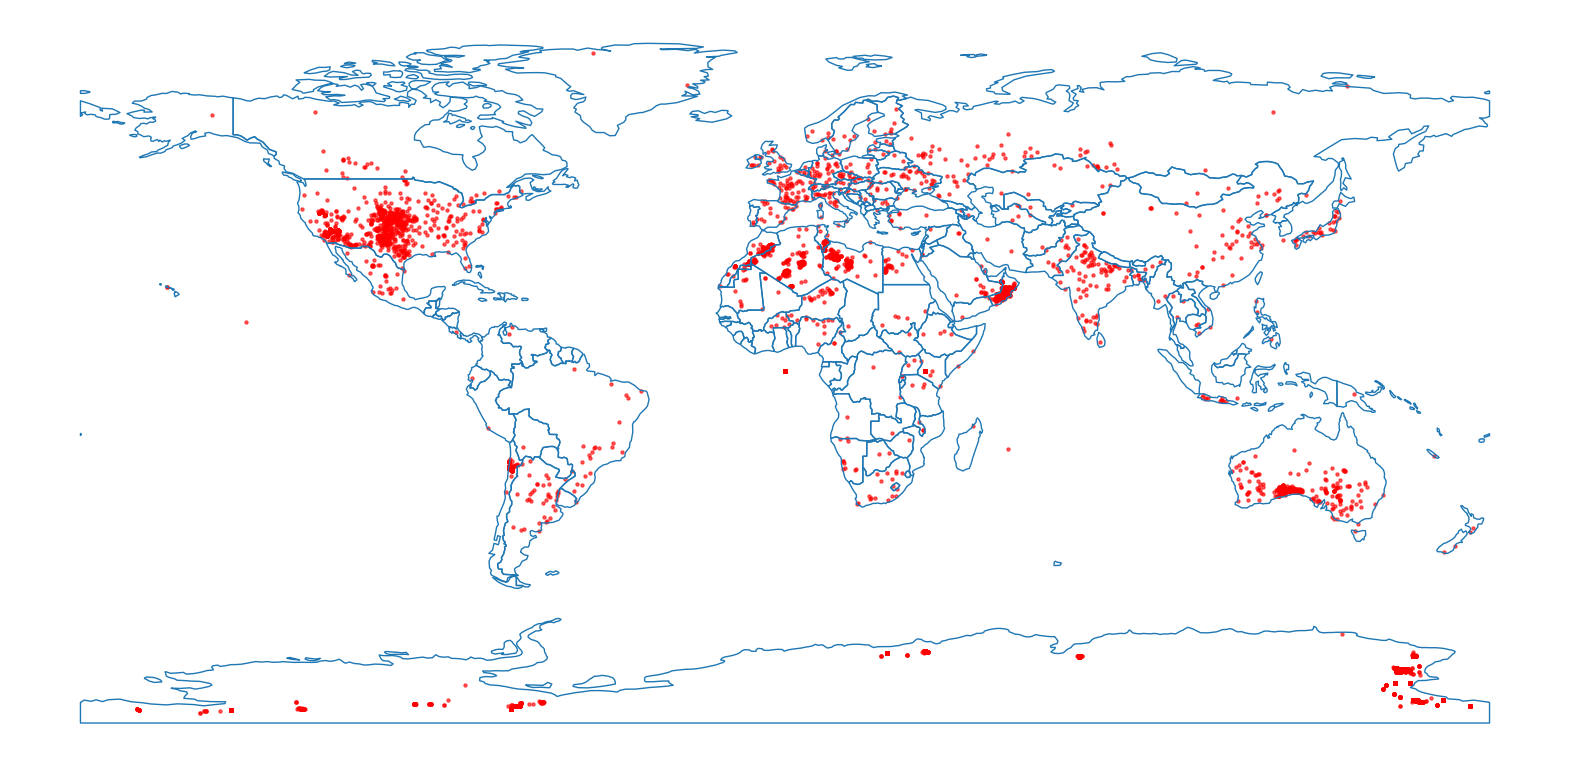

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


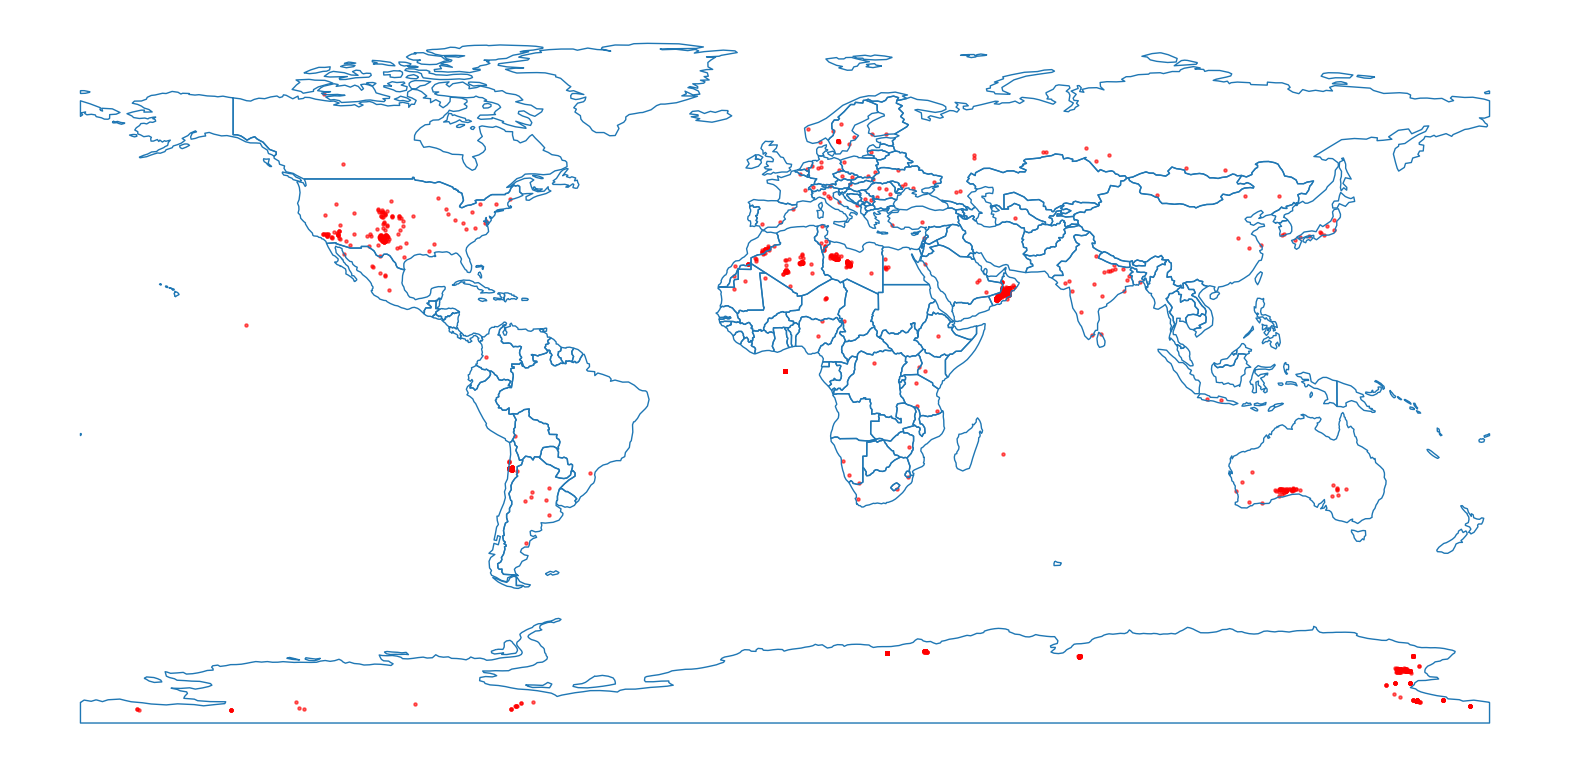

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


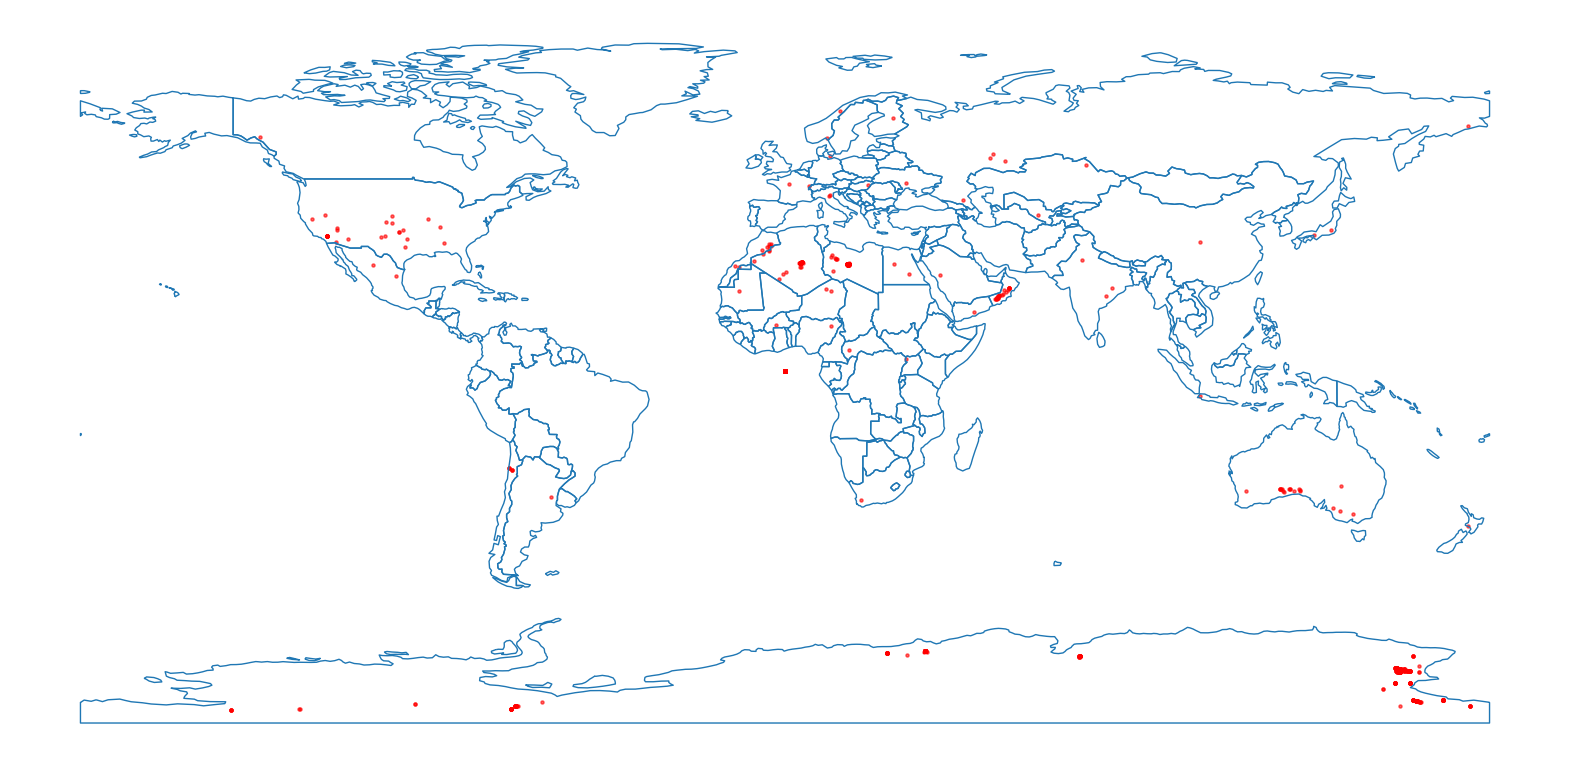

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


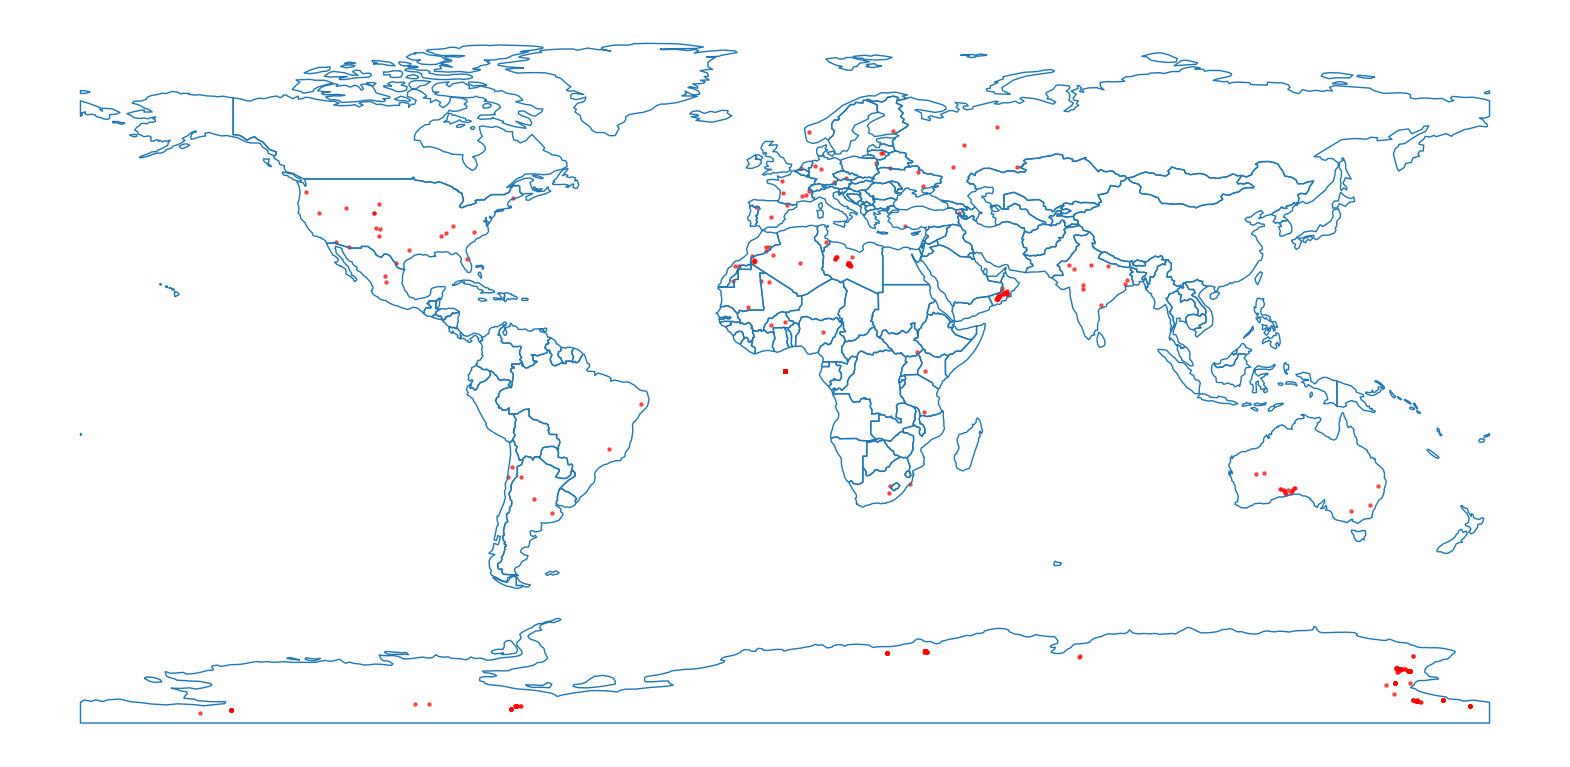

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


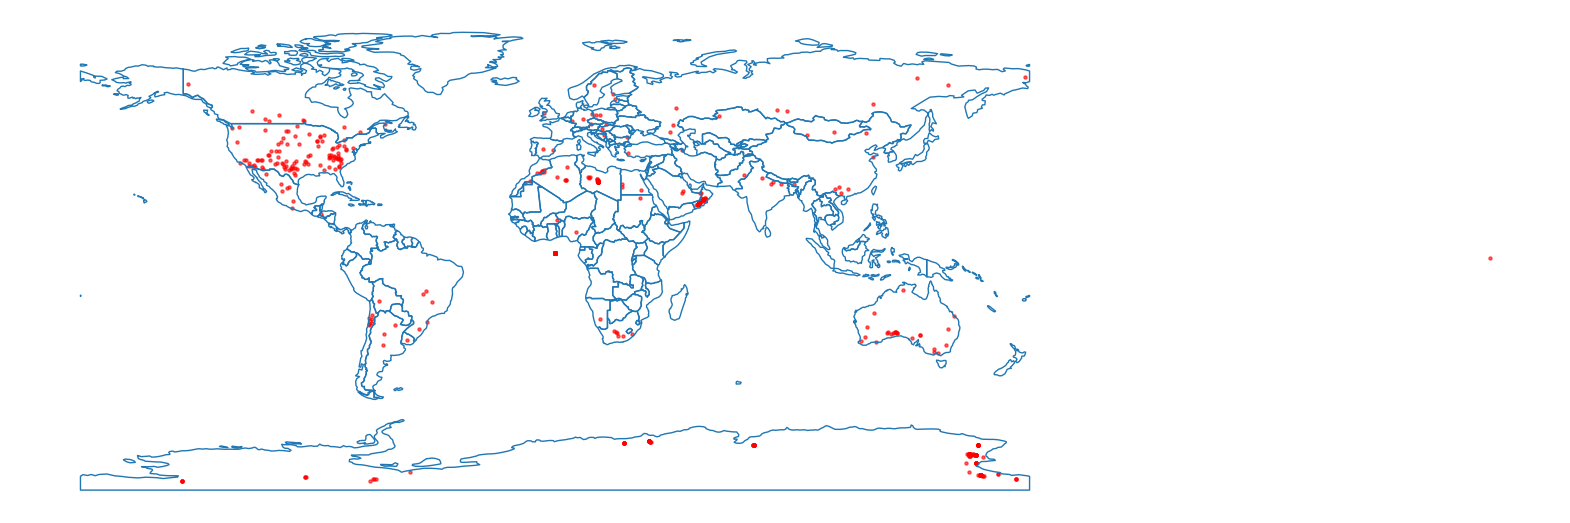

None None None None None


In [42]:
v=data[data['recclass']=='EC']
c=data[data['recclass']=='OC']
g=data[data['recclass']=='CC']
d=data[data['recclass']=='V']
r=data[data['recclass']=='PA']
print(map(v),map(c),map(g),map(d),map(r))

Il ne semble donc pas y avoir de corrélation entre le type de météorite et son lieu de chute , la répartition semble assez homogène

maintenant comparons le lieu de chutes des météorites en fonction de leur masses

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


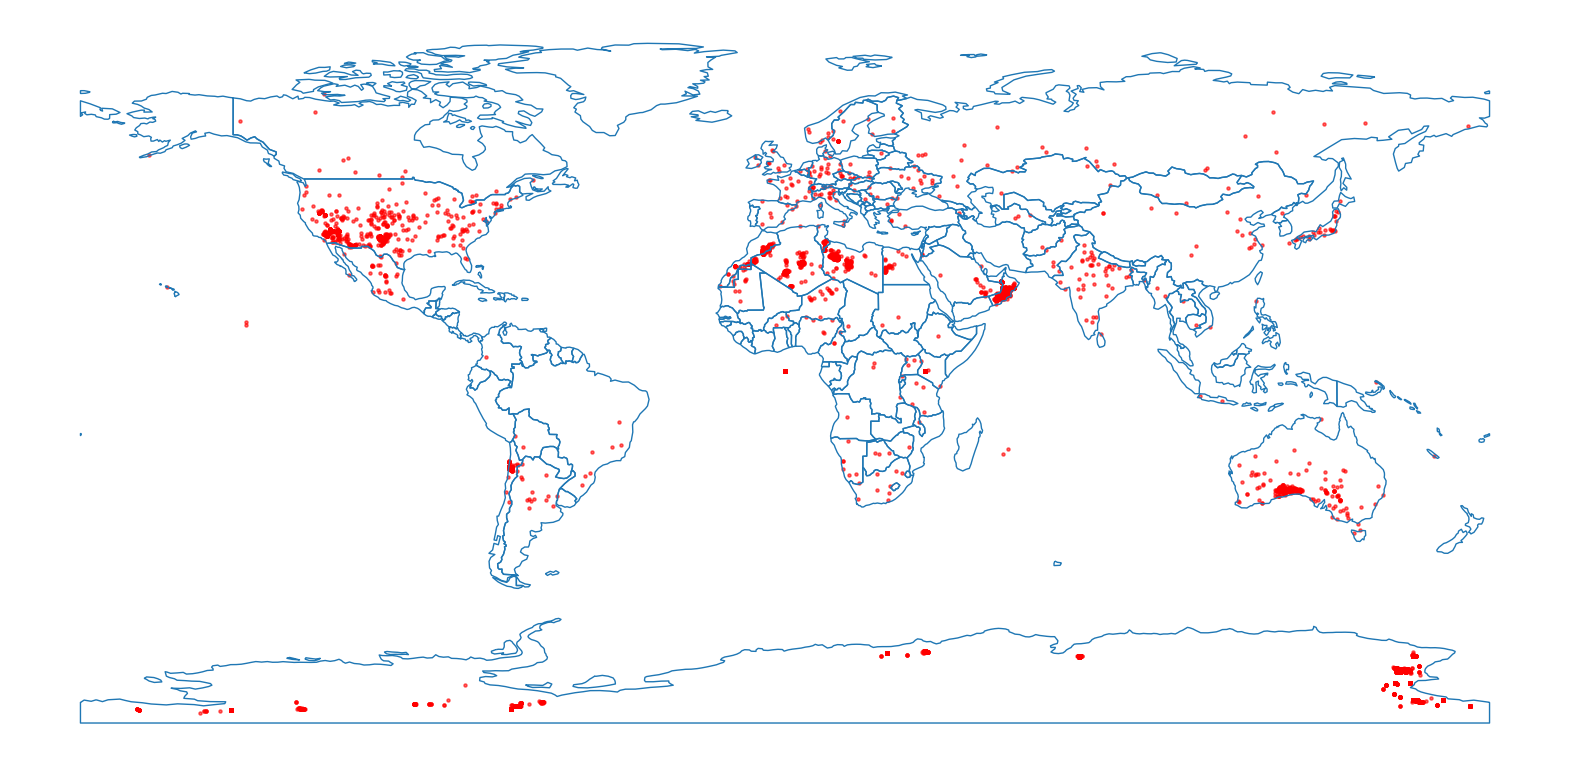

In [43]:
map(data[data['mass']<1])

les météorites légères ( moins de 1 kg semble répartit de façon homogène)

/tmp/ipykernel_33/2716516927.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


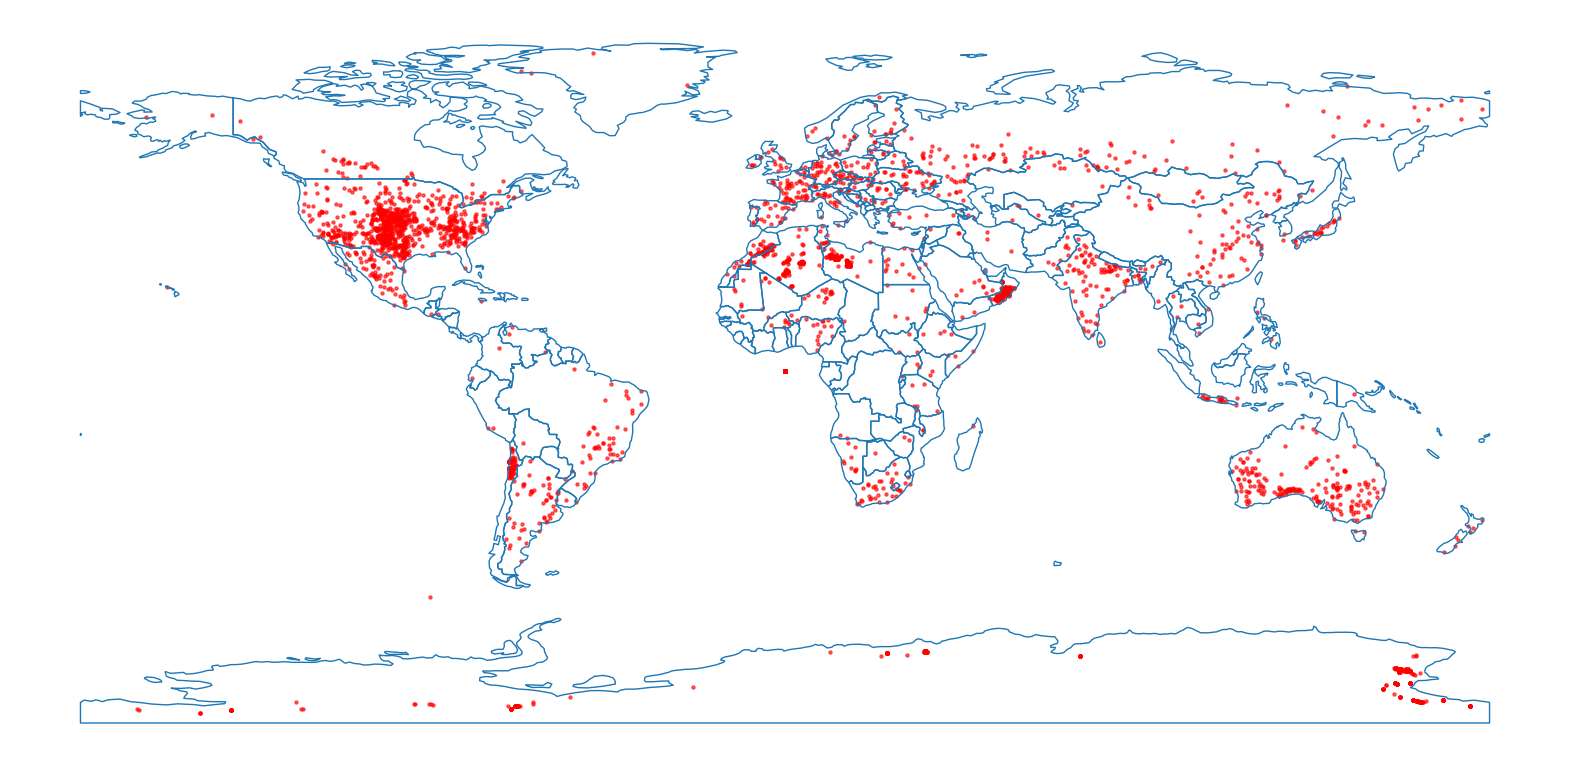

In [45]:
map(data[data['mass']>1])

les météorites lourdes aussi , donc la masse ne semble pas affecté le lieu de chute de la météorites

In [46]:
h=data.loc[(data['latitude']==0.0) & (data['longitude']==0.0)]
h

,name,id,nametype,recclass,mass,fall,year,latitude,longitude,GeoLocation
37,Northwest Africa 5815,50693,Valid,EC,0.25680,Found,NaN,0.0,0.0,"(0.000000, 0.000000)"
596,Mason Gully,53653,Valid,EC,0.02454,Fell,2010.0,0.0,0.0,"(0.000000, 0.000000)"
1648,Allan Hills 09004,52119,Valid,V,0.22170,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1649,Allan Hills 09005,55797,Valid,EC,0.12230,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1650,Allan Hills 09006,55798,Valid,EC,0.10430,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
...,...,...,...,...,...,...,...,...,...,...
45655,Yamato 984144,40764,Valid,EC,0.03744,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"
45656,Yamato 984145,40765,Valid,EC,0.05480,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"
45657,Yamato 984146,40766,Valid,EC,0.01932,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"
45658,Yamato 984147,40767,Valid,EC,0.11890,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"


il semble que 6212 météorites ont des coordonées de (0,0) ce qui semble absurde et pourrait simplement signifier que ces valeurs sont des NAN , remplaçont donc les     

In [47]:
condition = (data['latitude'] == 0.0) & (data['longitude'] == 0.0)

data.loc[condition,['longitude', 'latitude', 'GeoLocation']]=np.nan
data.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass             103
fall               0
year             286
latitude       13510
longitude      13510
GeoLocation    13510
dtype: int64

# MODELE DE RESEAUX DE NEURONES 

on separe les valeurs que l on doit prédire et celle qu on va utiliser pour le modèle 

In [48]:
data_na=data.loc[(data['latitude'].isnull()) & (data['longitude'].isnull())]
data_clean=data.dropna(subset=['longitude'])
data_clean


,name,id,nametype,recclass,mass,fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,EC,0.0210,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,EC,0.7200,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EC,107.0000,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,PA,1.9140,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,EC,0.7800,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,V,0.1720,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,P,0.0460,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,EC,0.0033,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,EC,2.1670,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [49]:
#X_train, X_test , y_train , y_test =train_test_split(data_clean['name'],
                                                    #data_clean[['latitude','longitude']],
                                                     #test_size=0.20,random_state=42)


In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding , Flatten, Dense

data_clean['name'] = pd.DataFrame(data_clean['name'])

# Ensure the column is of string type
data_clean['name'] =data_clean['name'].astype(str)

texts = data_clean['name'].values
coordinates = data_clean[['latitude', 'longitude']].values

# Tokenizer pour convertir les mots en séquences numériques
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Padding des séquences pour qu'elles aient la même longueur
max_length = max(len(seq) for seq in sequences)
data_padded = pad_sequences(sequences, maxlen=max_length)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_padded, coordinates, test_size=0.2, random_state=42)

# Paramètres du modèle
vocab_size = len(word_index) + 1  # Taille du vocabulaire + 1 pour le token 0
embedding_dim = 8  # Dimension des embeddings
input_length = max_length  # Longueur des séquences d'entrée

# Construire le modèle
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(2)  # 2 sorties pour latitude et longitude
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Résumé du modèle
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test), verbose=1)

# Évaluer le modèle sur l'ensemble de test
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Loss: {loss}, MAE: {mae}')

# Prédire avec le modèle
predictions = model.predict(X_test)
for i in range(len(X_test)):
    print(f"Input: {texts[i]}, Prediction: {predictions[i]}, Actual: {y_test[i]}")

/tmp/ipykernel_33/3539802245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['name'] = pd.DataFrame(data_clean['name'])
/tmp/ipykernel_33/3539802245.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['name'] =data_clean['name'].astype(str)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2396.5266 - mae: 31.3981 - val_loss: 493.4400 - val_mae: 9.4123
Epoch 2/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 394.1313 - mae: 8.6568 - val_loss: 507.1247 - val_mae: 10.4222
Epoch 3/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 177.7039 - mae: 6.1049 - val_loss: 448.9088 - val_mae: 7.0669
Epoch 4/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 88.7627 - mae: 4.3889 - val_loss: 433.4819 - val_mae: 6.1591
Epoch 5/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 49.7473 - mae: 3.2922 - val_loss: 442.4000 - val_mae: 7.8139
Epoch 6/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 31.9824 - mae: 2.6903 - val_loss: 435.6940 - val_mae: 7.1606
Epoch 7/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 25.3169 - mae: 2.5121 - val_loss: 423.2101 - val_mae: 5.8326
Epoch 8/80
803/803 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 17.6068 - mae: 1.9587 - val_loss: 417.7195 - val_mae: 6.2189
Epoch 9/80
803/803 ━━━━━━━

In [53]:
texts = data_na['name'].values



sequences = tokenizer.texts_to_sequences(texts)

data_na_pad = pad_sequences(sequences, maxlen=max_length)

In [55]:
L=model.predict(data_na_pad)
pd.DataFrame(L)

423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,0,1
0,4.596480,-44.774773
1,22.929911,4.470276
2,22.929911,4.470276
3,22.929911,4.470276
4,11.100448,9.724084
...,...,...
13505,26.591146,-1.436705
13506,26.591146,-1.436705
13507,26.591146,-1.436705
13508,25.234200,-0.696809


In [ ]:
map(data[data['name'].str.contains('af',case=False)])

In [60]:
data[(data['name'].str.contains('africa',case=False)) & (data['longitude'].notnull()) ]

,name,id,nametype,recclass,mass,fall,year,latitude,longitude,GeoLocation
26396,Northwest Africa 025,17035,Valid,EC,0.5100,Found,1999.0,30.33333,-5.83333,"(30.333330, -5.833330)"
26406,Northeast Africa 003,34271,Valid,LA,0.1240,Found,2000.0,30.46667,13.55000,"(30.466670, 13.550000)"
26408,Northwest Africa 002,17012,Valid,EC,0.2344,Found,1999.0,29.91667,-5.58333,"(29.916670, -5.583330)"
26409,Northwest Africa 003,17013,Valid,EC,0.1200,Found,1999.0,29.91667,-5.58333,"(29.916670, -5.583330)"
26410,Northwest Africa 004,17014,Valid,EC,0.1150,Found,1999.0,29.91667,-5.58333,"(29.916670, -5.583330)"
...,...,...,...,...,...,...,...,...,...,...
30814,Northwest Africa 844,17870,Valid,EC,0.6290,Found,2001.0,30.80800,-5.85583,"(30.808000, -5.855830)"
30815,Northwest Africa 845,17871,Valid,AC,0.0360,Found,2001.0,30.80800,-5.85583,"(30.808000, -5.855830)"
30818,Northwest Africa 848,17874,Valid,EC,4.5080,Found,2000.0,28.00083,-9.27000,"(28.000830, -9.270000)"
30819,Northwest Africa 850,17875,Valid,EC,5.3000,Found,2001.0,30.40667,-5.89233,"(30.406670, -5.892330)"
